# Exercise: Dimensionality Reduction and Clustering

In [2]:
% matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import mglearn

cancer = load_breast_cancer()
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data,cancer.target, random_state=0)

### (1) Use PCA to reduce the dimension of the cancer dataset, then apply supervised learning (logistic regression) using two principle components only. Steps:

#### (a) Scale the data using StandardScaler (zero mean and unit variance variables), then apply PCA to the scaled training data using two principle components. Print the shape of the training data before and after PCA is applied.


In [3]:
from sklearn import preprocessing 
scaler=preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test) 
print('training data shape before PCA is:', X_train_scaled.shape)

training data shape before PCA is: (426, 30)


In [4]:
N_components=2
pca = PCA(n_components=N_components).fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled) 
X_test_pca = pca.transform(X_test_scaled)
print('training data shape after PCA is:', X_train_pca.shape)

training data shape after PCA is: (426, 2)


#### (b) Print the variance explained by each of the two principle components

In [5]:
print('Explained variance,' , pca.explained_variance_ratio_)

Explained variance, [0.43315126 0.19586506]


#### (c) Use the two principle components to fit a logistic regression model with regularization parameter c=10. Find the accuracy. Compare it to the accuracy when all the original features (30 features) are used to fit the logistic regression model.

In [6]:
LogRegModel= LogisticRegression(C=10)
LogRegModel.fit(X_train_pca, Y_train)
accuracy = LogRegModel.score(X_test_pca, Y_test)
print('accuracy score with two principle components:', accuracy)

accuracy score with two principle components: 0.951048951048951


In [7]:
LogRegModel.fit(X_train_scaled, Y_train)
accuracy = LogRegModel.score(X_test_scaled, Y_test)
print('accuracy score with all features:', accuracy)

accuracy score with all features: 0.9440559440559441


### (2) Assume we do not know the actual labels, and use clustering algorithms on the training samples using the two derived principle components only.

#### (a) Apply K-means with random_state=0, and K=2. Use scatter plot to visualize the output of K-Means clustering algorithm. (x-axis is first principle component and y-axis is the second principle component). Also plot the actual labels.

In [8]:
clusters_kmeans = KMeans(n_clusters=2, random_state=0).fit_predict(X_train_pca);

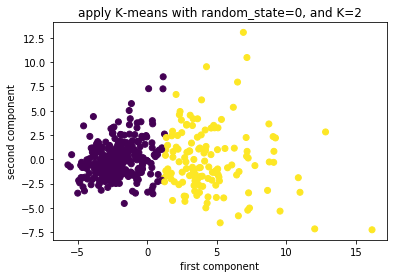

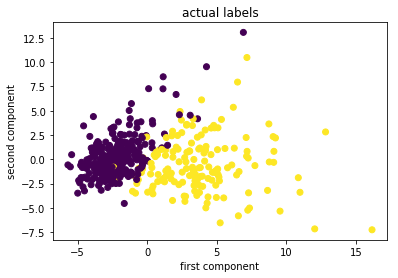

In [9]:
plt.title('apply K-means with random_state=0, and K=2')
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=clusters_kmeans)
plt.xlabel('first component')
plt.ylabel('second component')
plt.show()

plt.title('actual labels')
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=1-Y_train)
plt.xlabel('first component')
plt.ylabel('second component')
plt.show()

#### (b) Use the actual labels of Y_train to find the K-means clustering score using the adjusted_rand_score

In [10]:
score_Kmeans=adjusted_rand_score(clusters_kmeans, Y_train)
print('K-means clustering score is:', score_Kmeans)

K-means clustering score is: 0.6715634329506315


#### (c) Find the adjusted_rand_score if we used agglomerative clustering setting number of clusters to 2, using default linkage (Ward). 
  

In [11]:
clusters_Agglomerative = AgglomerativeClustering(n_clusters=2).fit_predict(X_train_pca)
score_agg = adjusted_rand_score(clusters_Agglomerative, Y_train)
print('agglomerative clustering score is:', score_agg)

agglomerative clustering score is: 0.6179959567912103
